<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [3]:
url = "https://raw.githubusercontent.com/Evelyn0924/Aprendizaje-Automatico-CD/refs/heads/main/Datos/Wholesale%20customers%20data.csv"
df = pd.read_csv(url, sep=';')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# Variables cuantitativas
numeric_cols = [
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicassen'
]

X = df[numeric_cols]

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=numeric_cols).describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


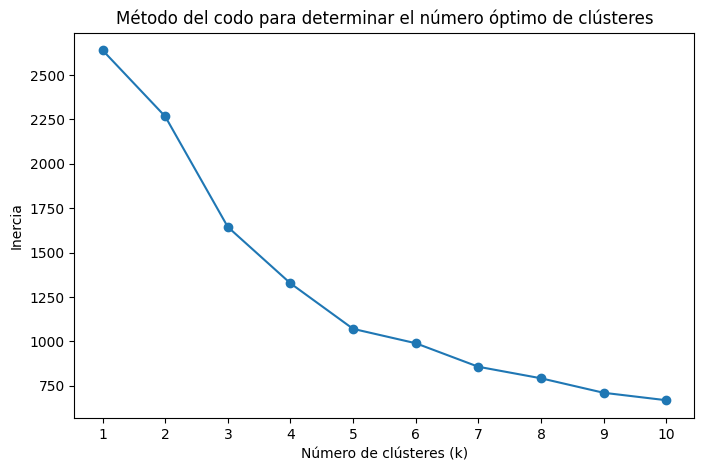

In [8]:
inercia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inercia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clústeres')
plt.xticks(k_values)
plt.show()


## Identificación del codo y explicación intuitiva

Al observar la gráfica del método del codo, el punto donde se identifica claramente el “codo” corresponde a **k = 5**. Hasta este valor, la inercia disminuye de forma pronunciada, lo que indica que agregar clústeres mejora significativamente la cohesión interna de los grupos. A partir de k = 5, la reducción de la inercia es mucho más gradual, lo que sugiere que aumentar el número de clústeres ya no aporta una mejora sustancial.

De manera intuitiva, k = 5 representa un buen equilibrio entre simplicidad y calidad del modelo: se obtienen clústeres suficientemente compactos sin sobresegmentar los datos. Elegir un valor mayor podría generar grupos innecesariamente pequeños, mientras que un valor menor no capturaría adecuadamente la estructura presente en los datos.


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [9]:
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42)

clusters_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = ['C' + str(c+1) for c in clusters_kmeans]

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,C4
1,2,3,7057,9810,9568,1762,3293,1776,C1
2,2,3,6353,8808,7684,2405,3516,7844,C1
3,1,3,13265,1196,4221,6404,507,1788,C4
4,2,3,22615,5410,7198,3915,1777,5185,C2


In [10]:
df.groupby('Cluster')[numeric_cols].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
C1,5509.250000,10555.635417,16477.927083,1420.125000,7199.406250,1658.791667
C2,34188.627119,4850.576271,5870.000000,7215.559322,955.847458,2491.796610
C3,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
C4,9112.235294,2965.404412,3783.702206,2413.591912,976.908088,974.926471
C5,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000


In [11]:
df.groupby('Cluster')[numeric_cols].agg(['min', 'max'])

Fresh           Milk        Grocery        Frozen         \
           min     max    min    max     min    max    min    max   
Cluster                                                             
C1          18   24653   1275  25862    4748  36486     25  10155   
C2        4983  112151    286  29627     471  21042    287  35009   
C3          85   44466   4980  73498   22019  92780     36   7782   
C4           3   26539     55  18664       3  16483     47  16919   
C5       32717   36847  16784  43950   13626  20170  36534  60869   

        Detergents_Paper        Delicassen         
                     min    max        min    max  
Cluster                                            
C1                   282  17120          3   7844  
C2                    20   4948          3  14472  
C3                  4337  40827        903  16523  
C4                     3   5316          3   5137  
C5                   239   1272       5609  47943

In [12]:
for cluster in df['Cluster'].unique():
    print(f'Cluster {cluster} - cantidad de elementos: {df[df["Cluster"] == cluster].shape[0]}')
    display(df[df['Cluster'] == cluster].head(5))

Cluster C4 - cantidad de elementos: 272


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,C4
3,1,3,13265,1196,4221,6404,507,1788,C4
5,2,3,9413,8259,5126,666,1795,1451,C4
6,2,3,12126,3199,6975,480,3140,545,C4
7,2,3,7579,4956,9426,1669,3321,2566,C4


Cluster C1 - cantidad de elementos: 96


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
1,2,3,7057,9810,9568,1762,3293,1776,C1
2,2,3,6353,8808,7684,2405,3516,7844,C1
9,2,3,6006,11093,18881,1159,7425,2098,C1
10,2,3,3366,5403,12974,4400,5977,1744,C1
13,2,3,21217,6208,14982,3095,6707,602,C1


Cluster C2 - cantidad de elementos: 59


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
4,2,3,22615,5410,7198,3915,1777,5185,C2
12,2,3,31714,12319,11757,287,3881,2931,C2
22,1,3,31276,1917,4469,9408,2381,4334,C2
29,1,3,43088,2100,2609,1200,1107,823,C2
33,1,3,29729,4786,7326,6130,361,1083,C2


Cluster C3 - cantidad de elementos: 11


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
23,2,3,26373,36423,22019,5154,4337,16523,C3
47,2,3,44466,54259,55571,7782,24171,6465,C3
56,2,3,4098,29892,26866,2616,17740,1340,C3
61,2,3,35942,38369,59598,3254,26701,2017,C3
65,2,3,85,20959,45828,36,24231,1423,C3


Cluster C5 - cantidad de elementos: 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
183,1,3,36847,43950,20170,36534,239,47943,C5
325,1,2,32717,16784,13626,60869,1272,5609,C5


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

## Análisis de los grupos obtenidos con k-Means

El algoritmo k-Means permitió segmentar a los clientes en cinco grupos bien diferenciados según su patrón de gasto anual en las distintas categorías de productos.

**Cluster C1 - Cliente de consumo medio**  
Este grupo presenta valores promedio moderados en todas las categorías, destacando Grocery y Milk. Corresponde a clientes con un consumo estable y balanceado, sin valores extremos.

**Cluster C2 - Cliente con alto consumo de Fresh y Frozen**  
Los clientes de este grupo se caracterizan por un gasto elevado en Fresh y Frozen, con consumos medios en el resto de categorías. Representan negocios enfocados en productos frescos y congelados.

**Cluster C3 - Cliente mayorista de alto consumo general**  
Este grupo presenta los valores promedio más altos en Milk, Grocery y Detergents_Paper, lo que indica un perfil claramente mayorista con un volumen de compra elevado y diversificado.

**Cluster C4 - Cliente de bajo consumo**  
Es el grupo más numeroso y se caracteriza por bajos niveles de gasto en todas las categorías. Representa pequeños negocios o clientes con compras ocasionales.

**Cluster C5 - Cliente altamente especializado**  
Este grupo, compuesto por pocos clientes, presenta valores extremadamente altos en Fresh y Frozen, lo que indica un perfil altamente especializado y atípico respecto al resto de los clústeres.

En general, el análisis de las medias, así como de los valores mínimos y máximos, muestra que los grupos obtenidos son coherentes y presentan patrones de consumo claramente diferenciados. La asignación de los integrantes a cada clúster confirma que k-Means logró identificar perfiles de clientes homogéneos dentro de cada grupo.


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

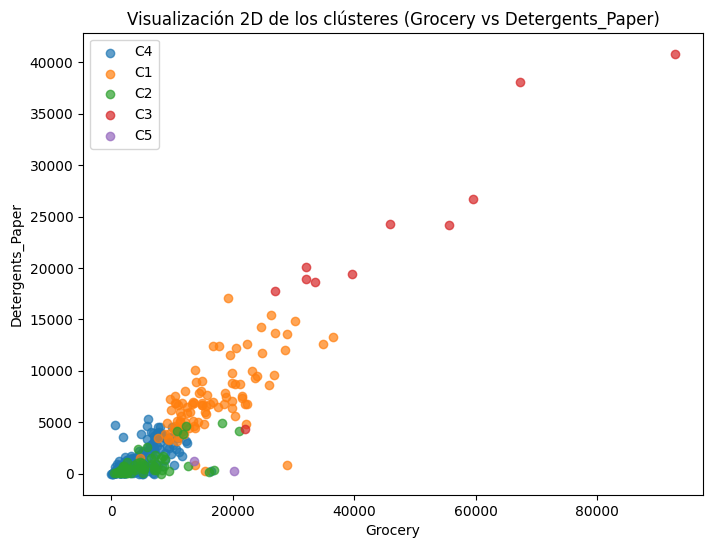

In [13]:
plt.figure(figsize=(8, 6))

for cluster in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster]
    plt.scatter(
        subset['Grocery'],
        subset['Detergents_Paper'],
        label=cluster,
        alpha=0.7
    )

plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Visualización 2D de los clústeres (Grocery vs Detergents_Paper)')
plt.legend()
plt.show()

## Evaluación visual de los grupos

A partir de la visualización 2D utilizando las variables Grocery y Detergents_Paper, los grupos obtenidos pueden considerarse buenos en términos generales. Se observa que algunos clústeres presentan una separación clara, especialmente aquellos con niveles altos de gasto, mientras que los clústeres de consumo bajo y medio muestran cierto solapamiento.

Este comportamiento es esperable, ya que se está analizando únicamente dos variables y algunos clientes presentan patrones de consumo similares en estas categorías. No obstante, la gráfica permite identificar una estructura coherente, diferenciando clientes de bajo, medio y alto consumo, lo que confirma que el modelo k-Means capturó adecuadamente patrones relevantes en los datos.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

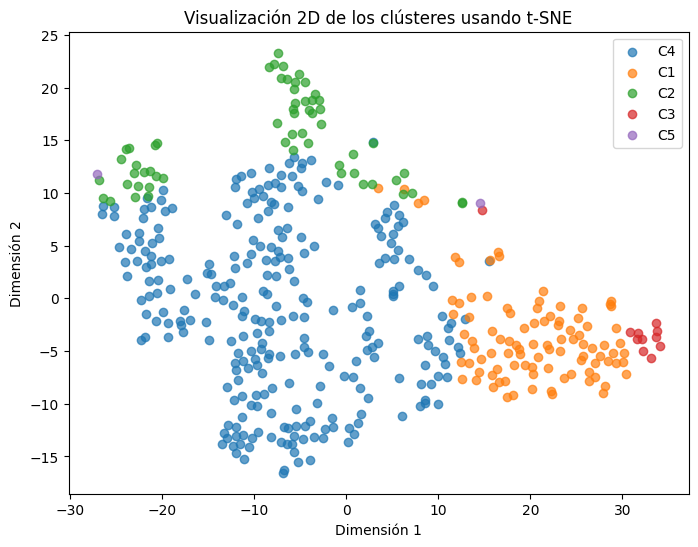

In [15]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Cluster'] = df['Cluster'].values

# Gráfica 2D
plt.figure(figsize=(8, 6))

for cluster in df_tsne['Cluster'].unique():
    subset = df_tsne[df_tsne['Cluster'] == cluster]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=cluster, alpha=0.7)

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización 2D de los clústeres usando t-SNE')
plt.legend()
plt.show()

## Evaluación de los grupos usando t-SNE

A partir de la visualización 2D obtenida mediante t-SNE, los grupos pueden considerarse buenos, ya que se observa que varios clústeres forman agrupaciones compactas y relativamente bien separadas. En comparación con otras visualizaciones, t-SNE permite apreciar con mayor claridad la estructura local de los datos y la cohesión interna de algunos grupos.

Sin embargo, es importante señalar que t-SNE no proporciona un porcentaje de varianza explicada, a diferencia de métodos como PCA. Esto se debe a que t-SNE no es una técnica lineal de reducción de dimensionalidad, sino un método no lineal que se enfoca en preservar las relaciones locales entre observaciones.

Por esta razón, no es posible indicar un porcentaje de varianza explicada en este gráfico. Aun así, esta característica no afecta negativamente la visualización, ya que el objetivo de t-SNE es facilitar la interpretación visual de los clústeres y no explicar la variabilidad total de los datos.


---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [17]:
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)

silhouette_kmeans

np.float64(0.36890127429678043)

## Métrica de la silueta para k-Means

La métrica de la silueta obtenida para los grupos formados mediante el algoritmo k-Means es de aproximadamente **0.37**.

Este valor indica que los clústeres presentan una calidad aceptable, con una separación razonable entre los grupos y una coherencia interna adecuada. Aunque existe cierto solapamiento entre algunos clústeres, el resultado es consistente con las visualizaciones realizadas, donde se observan grupos relativamente compactos y diferenciados.

En general, los grupos obtenidos pueden considerarse adecuados para un análisis exploratorio, reflejando una segmentación coherente de los clientes según sus patrones de gasto.
